# 전국 신규 민간 아파트 분양가격 동향

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd   # 파이썬에서 쓸 수 있는 excel
import numpy as np
import re
from plotnine import *
pre_sale = pd.read_csv('data/전국_평균_분양가격(2018.7월).csv', encoding='euc-kr')

In [4]:
pre_sale.shape      # (행, 열)
pre_sale.head()     # 위에서 5개 데이터 가져옴
pre_sale.tail()     # 뒤에서 5개 데이터 가져옴
pre_sale.info()     # 요약
pre_sale.dtypes     # 데이터형태 확인
pre_sale.isnull().sum()     # 결축치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

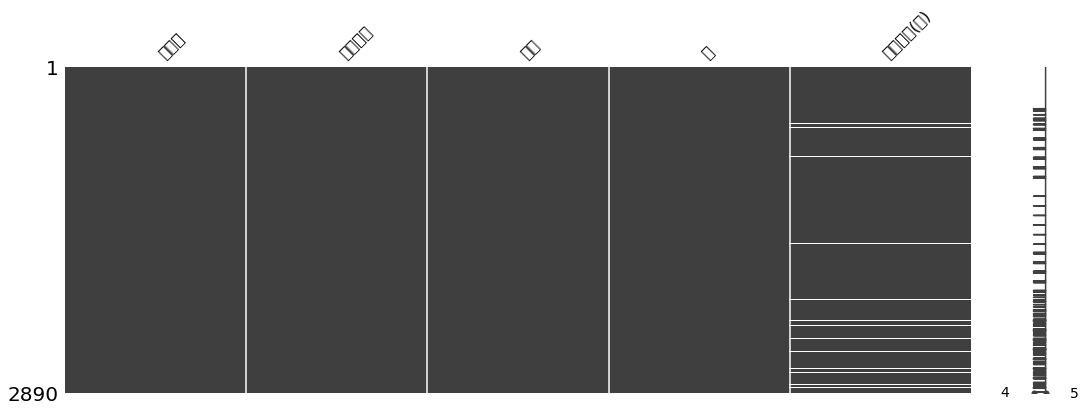

In [5]:
# 결축치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18, 6))

In [6]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경 
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [7]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [8]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해봅시다.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [9]:
pre_sale.info()     # 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [10]:
pre_sale.dtypes     # 데이터형태 확인

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [11]:
pre_sale.isnull().sum()     # 결축치 확인

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [12]:
pre_sale.describe()  # float데이터 요약(단위: 천원)

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [13]:
pre_sale.describe?

In [14]:
pre_sale.describe(include=[np.object])  # object타입의 데이터요약 (top은 랜덤값)

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,세종,전용면적 85㎡초과 102㎡이하,2016,6,2221
freq,170,578,1020,255,17


In [15]:
# 2017년 데이터만 봅니다. (연도 데이터타입='str')
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017.shape  # (행, 열)

(1020, 7)

In [16]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 85㎡초과 102㎡이하    578
전용면적 60㎡이하           578
전체                   578
전용면적 60㎡초과 85㎡이하     578
전용면적 102㎡초과          578
Name: 규모구분, dtype: int64

In [17]:
pre_sale['지역명'].value_counts()

세종    170
경기    170
부산    170
충남    170
대전    170
충북    170
제주    170
대구    170
강원    170
전남    170
울산    170
경북    170
광주    170
경남    170
인천    170
서울    170
전북    170
Name: 지역명, dtype: int64

# 전국평균 분양가격
- groupby와 pivot_table 활용하기

In [18]:
# 현재 분양가격, 평균분양가격만 숫자타입.
# 분양가격만 봤을때 2015년에서 2018년으로 갈수록 올라가는것을 확인할 수 있다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T   # Transpose (행과 열 바꾸기)   # describe(): 기본= 숫자타입만

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

# 규모별 전국 평균 분양가격
- pivot_table(values, index, columns, ...)

In [19]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')   # values, index, columns

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


# 전국 분양가 변동금액
<br>
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [20]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [21]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
print( region_year['변동액'] )
max_delta_price = np.max(region_year['변동액'])*1000    # 평균값의 최대값
min_delta_price = np.min(region_year['변동액'])*1000    # 평균값의 최소값
mean_delta_price = np.mean(region_year['변동액'])*1000  # 평균값의 평균값

print('1. 2015~2018년까지 분양가는 계속상승했음. 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다'.format(max_delta_price))
print('2. 상승액이 가장 작은 지역은 울산이며, 평당 {:,.0f}원이다.'.format(min_delta_price))
print('3. 하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.')
print('4. 전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

0      481
1     2503
2     1308
3     1171
4     1585
5     2504
6     1506
7     2449
8     2603
9     1624
10     369
11     721
12    1474
13     869
14    5087
15     882
16    1247
Name: 변동액, dtype: int32
1. 2015~2018년까지 분양가는 계속상승했음. 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,087,000원이다
2. 상승액이 가장 작은 지역은 울산이며, 평당 369,000원이다.
3. 하지만 나중에 살펴보겠지만 울산에는 결측치가 많다. 따라서 변동액이 가장 작다라고 판단하기 어렵다.
4. 전국 평균 변동액은 평당 1,669,588원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


# 시각화
- pandas, seaborn

## 연도별 변동 그래프
- 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려봄
- 폰트 설정을 위해 Matplotlib의 환경설정에서 한글폰트 설정이 필요.

In [22]:
import seaborn as sns
sns.set_style('whitegrid')    # 숫자를 따라 하얀 선 생김 

In [23]:
import matplotlib.pyplot as plt
# 한글 폰트설정
plt.rc('font', family='Malgun Gothic')

## 막대그래프
- 바 차트, 바 그래프 라고도 불림.
- 주로 범주형 데이터를 표현하는 차트나 그래프

## 1. Seaborn으로 막대그래프 그리기

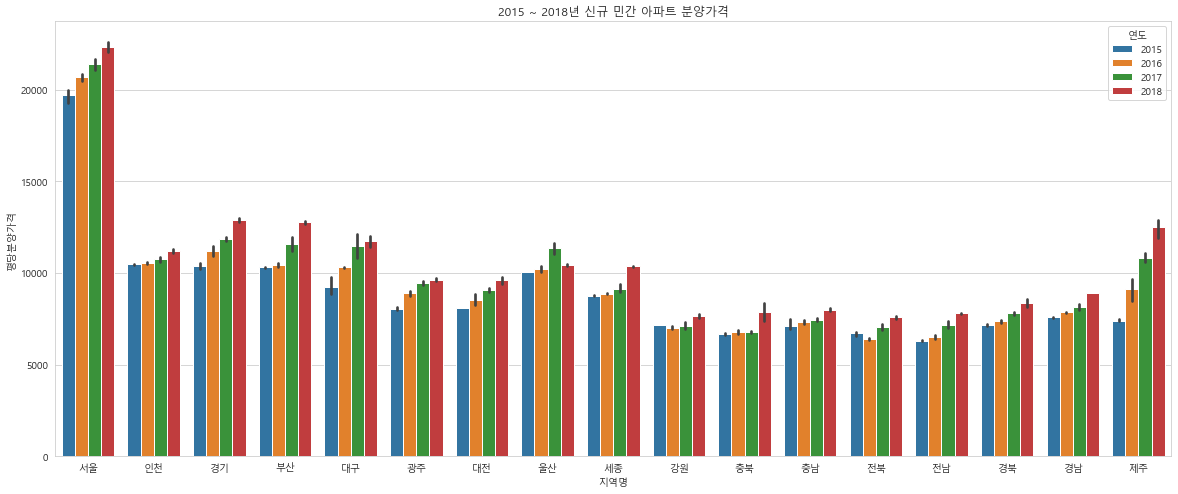

In [24]:
plt.figure(figsize=(20, 8))
plt.title('2015 ~ 2018년 신규 민간 아파트 분양가격')
sns.barplot(data=region_year_all, x='지역명', y='평당분양가격', hue='연도')    # x축, y축, 막대

## 2. Pandas로 막대그래프 그리기

In [25]:
# 피벗테이블
# pandas로 시각화 하기위해 적합한 형태로 데이터를 변형해야한다.
df_year_region = pd.pivot_table(region_year_all, index=['지역명'], columns='연도', values='평당분양가격')
df_year_region.sample(3)    # 랜덤하게 샘플 3개만 뽑아오도록

연도,2015,2016,2017,2018
지역명,,,,
경기,"10,377","11,220","11,850","12,881"
대전,"8,098","8,502","9,045","9,604"
서울,"19,725","20,663","21,376","22,329"


In [26]:
df_year_region.columns

Index(['2015', '2016', '2017', '2018'], dtype='object', name='연도')

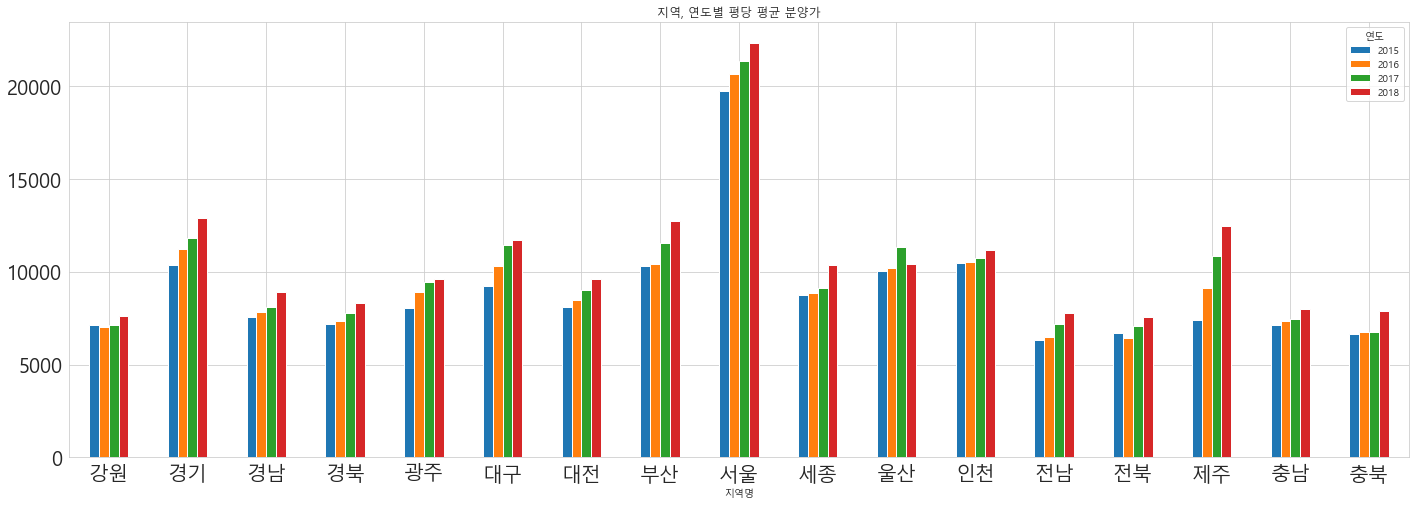

In [27]:
df_year_region.plot.bar(figsize=(24, 8), grid=True, fontsize=20, rot=0, title="지역, 연도별 평당 평균 분양가")
# 기본형태 : df_year_region.plot.bar()
# rot = 0 : 회전할 각도 (없으면, 지역명이 세로로 나온다.)

## 규모별
- seaborn의 barplot은 기본값을 평균으로 구한다.
- seaborn의 barplot의 옵션 중 ci(confidence interval)는 신뢰구간을 의미하며, 기본값은 95이다.
- 표본의 95%의 데이터가 (막대 상단의) 검은색 선 안에 위치하고 있음을 확인할 수 있다.
- 나머지 5%는 이 표본을 벗어나는 데이터로 너무 크거나 작은 데이터를 제외하고 볼 수 있다.

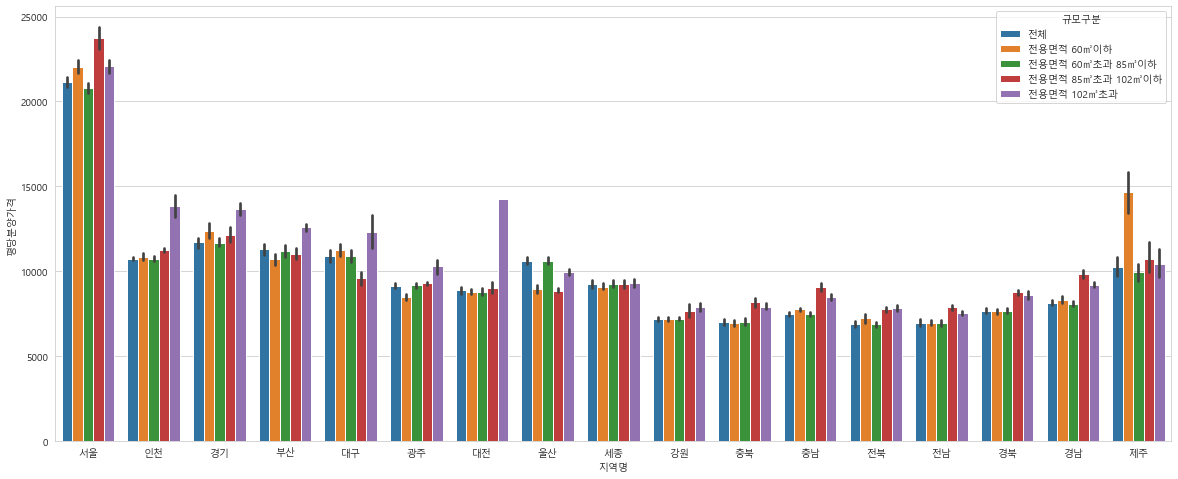

In [28]:
plt.figure(figsize=(20, 8))
sns.barplot(data=pre_sale, x='지역명', y='평당분양가격', hue='규모구분')

## 지역별 평당 분양가격 합계
- 아래 데이터로 규모(제곱미터)에 따른 평당 분양가격을 봅니다.

In [29]:
pre_sale_size = pre_sale.pivot_table('평당분양가격', '지역명', '규모구분')     # values, index, columns
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
충북,"7,933","6,969","7,044","8,171","6,994"
대전,"14,282","8,798","8,807","9,037","8,880"
서울,"22,058","22,046","20,781","23,754","21,169"


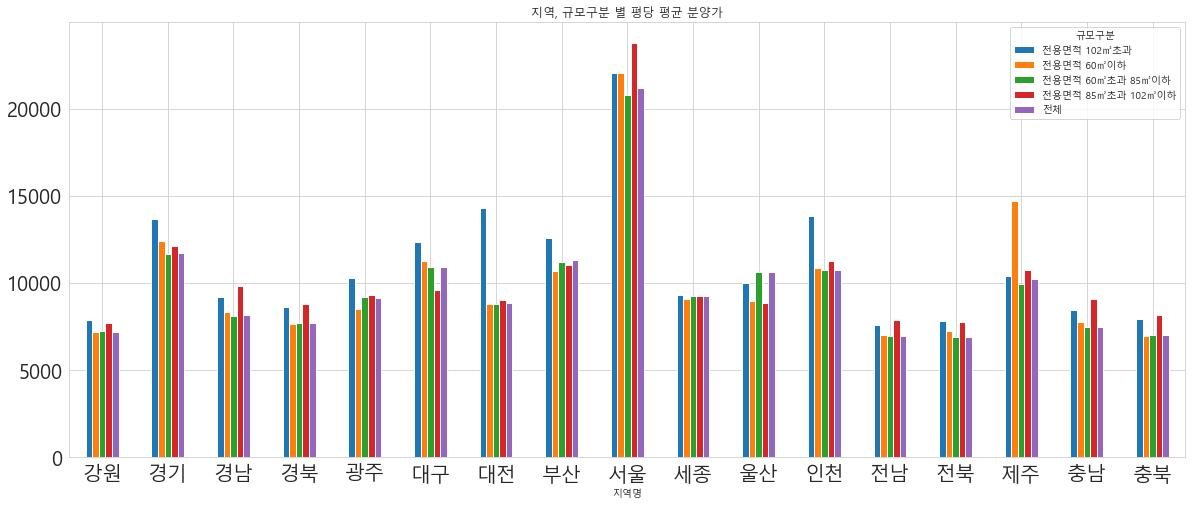

In [30]:
pre_sale_size.plot.bar(title='지역, 규모구분 별 평당 평균 분양가', figsize=(20, 8), grid=True, fontsize=20, rot=0)

In [33]:
# 그래프에서 봤을때, 대전지역에 결측치가 많음을 예상할 수 있다.
pre_sale[ (pre_sale['지역명'] == '대전') &  (pre_sale["규모구분"] == '전용면적 102㎡초과') ]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
34,대전,전용면적 102㎡초과,2015,10,,nan,nan
119,대전,전용면적 102㎡초과,2015,11,,nan,nan
204,대전,전용면적 102㎡초과,2015,12,,nan,nan
289,대전,전용면적 102㎡초과,2016,1,,nan,nan
374,대전,전용면적 102㎡초과,2016,2,NaN,nan,nan
459,대전,전용면적 102㎡초과,2016,3,NaN,nan,nan
544,대전,전용면적 102㎡초과,2016,4,NaN,nan,nan
629,대전,전용면적 102㎡초과,2016,5,NaN,nan,nan
714,대전,전용면적 102㎡초과,2016,6,NaN,nan,nan
799,대전,전용면적 102㎡초과,2016,7,NaN,nan,nan


## 전국 규모(면적)별 신규 민간 아파트 분양가격

In [32]:
pre_sale.sample()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
2366,경북,전용면적 60㎡이하,2018,1,2525,"2,525","8,332"


In [34]:
pre_sale[['지역명', '평당분양가격', '규모구분']].sample(3)

,지역명,평당분양가격,규모구분
584,경북,"7,636",전용면적 102㎡초과
948,경기,"10,824",전용면적 85㎡초과 102㎡이하
706,광주,"8,471",전용면적 60㎡이하


In [35]:
pre_sale.shape    # 행,열

(2890, 7)

In [36]:
# 결축치 개수를 확인합니다.
pre_sale['평당분양가격'].isnull().sum()

232

In [38]:
# 결축치가 있으면 제대로 된 시각화를 할 수 없기 때문에 drop한다.
pre_sale['평당분양가격'].dropna(inplace=True, axis=0)    # axis=0 : row를 기준으로 drop
                                                          # axis=1: column을 기준으로 drop

In [39]:
# 결축치가 없습니다.
pre_sale['평당분양가격'].isnull().sum()

0

In [40]:
pre_sale.shape    # 행,열

(2890, 7)

In [42]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [43]:
# 평당분양가격을 int형 으로 변환
pre_sale['평당분양가격'] = pre_sale['평당분양가격'].astype(int)

In [44]:
# 혹시 아직도 결측치가 남아있는지 확인 
pre_sale[pre_sale['평당분양가격'] == 0]

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격


In [45]:
pre_sale['규모구분'].unique()    # 중복이 제거된 값만 나온다

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [46]:
pre_sale_size.sample(3)

규모구분,전용면적 102㎡초과,전용면적 60㎡이하,전용면적 60㎡초과 85㎡이하,전용면적 85㎡초과 102㎡이하,전체
지역명,,,,,
경북,"8,616","7,661","7,690","8,776","7,696"
서울,"22,058","22,046","20,781","23,754","21,169"
광주,"10,296","8,518","9,176","9,296","9,167"


## box-and-whisker plot (상자 수염 그림)

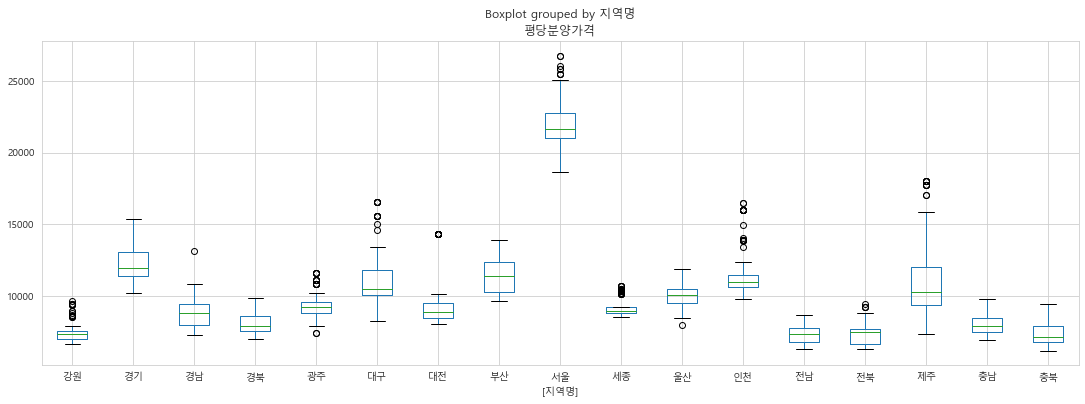

In [47]:
# 아래 그래프를 통해 지역마다 0값이 존재하는 것으로 결축치가 있음을 확인할 수 있다.
pre_sale[['지역명', '평당분양가격']].boxplot(by=['지역명'], figsize=(18, 6))     # y축: 평균평당분양가격, x축: 지역명 

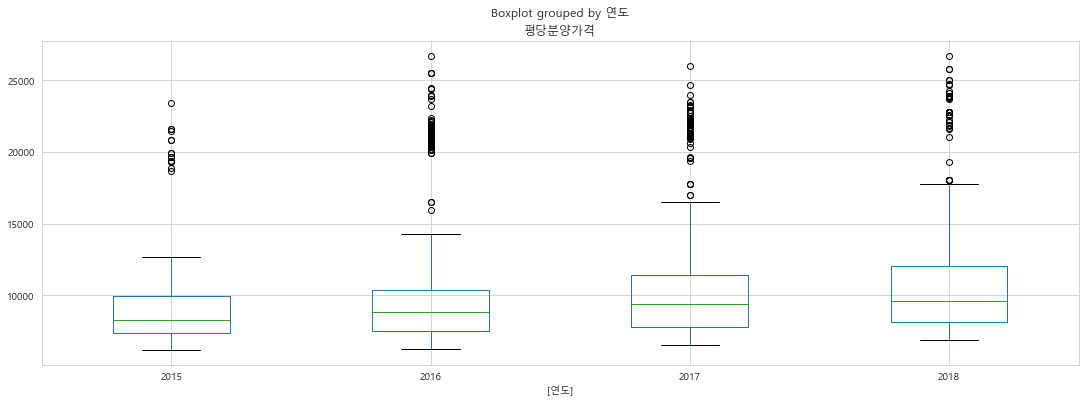

In [48]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(18, 6))

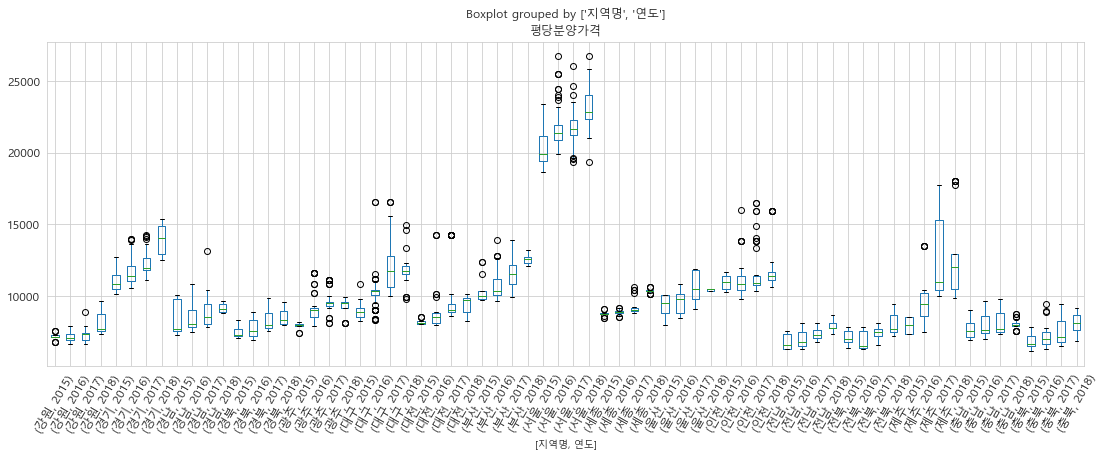

In [50]:
pre_sale[['연도', '지역명', '평당분양가격']].boxplot(
    by=['지역명', '연도'],
    figsize=(18, 6),
    fontsize=12,
    rot=60)   # 회전각 60도

In [51]:
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']

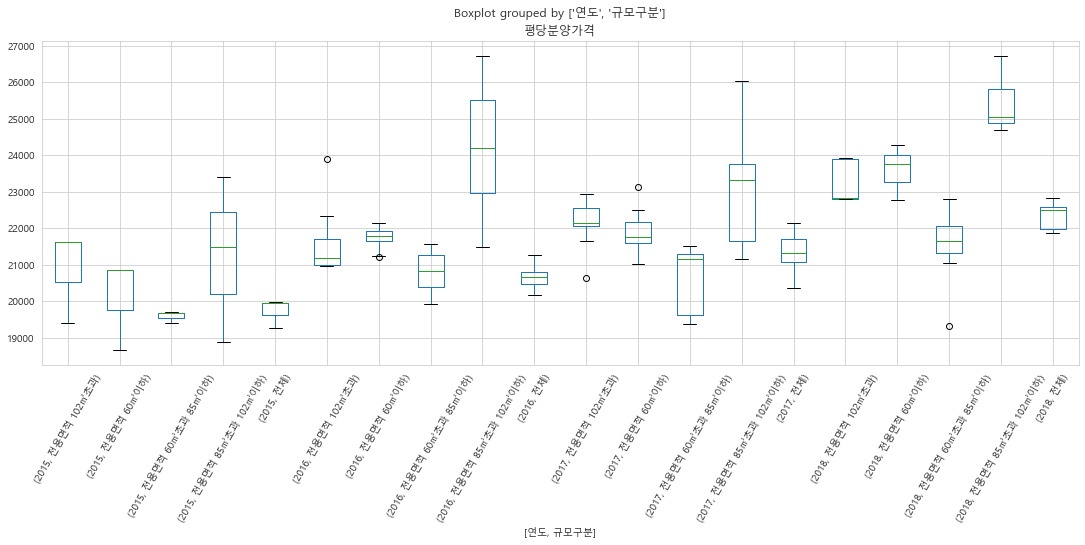

In [52]:
pre_sale_seoul[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6),
    rot=60)   # 회전각 60도

In [56]:
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']

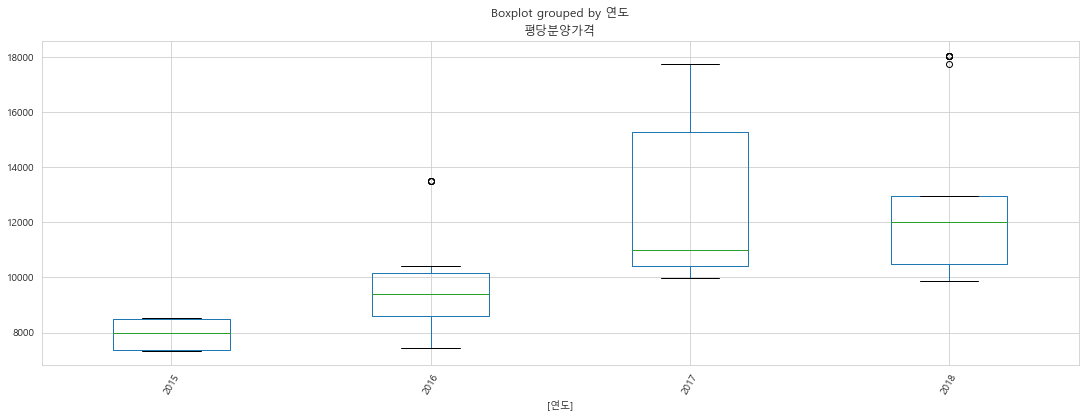

In [57]:
pre_sale_jeju[['연도','평당분양가격']].boxplot(
    by=['연도'],
    figsize=(18, 6),
    rot=60)   # 회전각 60도

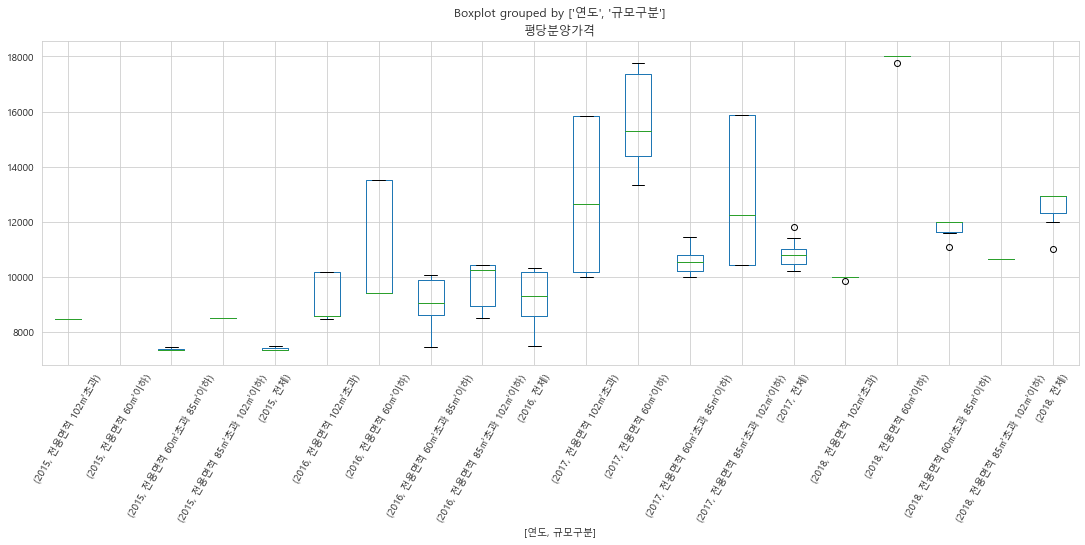

In [58]:
pre_sale_jeju[['연도', '규모구분', '평당분양가격']].boxplot(
    by=['연도', '규모구분'],
    figsize=(18, 6),
    rot=60)   # 회전각 60도

In [59]:
pre_sale_jeju.isnull().sum()   # 결측치 개수

지역명         0
규모구분        0
연도          0
월           0
분양가격(㎡)    18
분양가격       25
평당분양가격     25
dtype: int64

## Tidy Data 만들기
- ##### 2015년 이전의 데이터 (2013.12 ~ 2015.9) 평당 분양가격

In [63]:
df = pd.read_csv('data/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', encoding='euc-kr', skiprows=1, header=0, engine='python')

df.shape

(23, 27)

In [62]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [67]:
year = df.iloc[0]    # 0번째 행
month = df.iloc[1]   # 1번째 행

In [68]:
year   # 인덱스, 요소

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [69]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i>2 and i<15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i>=15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i==2:
        year[i] = ' '.join([year[i], month[i]])
    elif i==1:
        year[i] = '시군구'
        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [71]:
df.columns = year    # 컬러명을 year로 바꾸기 
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
0,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [72]:
df = df.drop(df.index[[0, 1]])     # 0,1번째 행 버리기 
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [73]:
# 지역 컬럼을 새로 만들어 '시도'와 '시군구'를 합쳐줍니다.
df['구분'] = df['구분'].fillna('')      # 결측치를 빈문자('')로 채웁니다.
df['시군구'] = df['시군구'].fillna('')

In [74]:
df['지역'] = df['구분'] + df['시군구']     # 합쳐주기 
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [79]:
melt_columns = df.columns.copy()      # 열 확인 
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [81]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월'])
df_2013_2015.head()     # 상위 5개 데이터

# 원래 df는 연도와 월이 column에 있었음.
# 이제는 연도와 월이 지역 옆에 붙어있게 됐다. (pandas의 melt과정)

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [84]:
df_2013_2015.columns = ['지역', '기간', '분양가']    # 컬럼명 바꾸어주기
df_2013_2015.head()     # 상위 5개 데이터

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [87]:
# 간단하게 표현하기 위해서 lambda 함수로 구현.
df_2013_2015['연도'] = df_2013_2015['기간'].apply(
    lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(
    lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())    # re.sub(바꿀 대상, 바꿀 값)
                                                                                 # strip() : 양쪽 공백 제거 

In [88]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


## 지역명 강원과 부산 정리

In [89]:
df_2013_2015['지역'].value_counts()

           44
대구         22
제주         22
지방강원       22
전남         22
경북         22
충북         22
세종         22
인천         22
6대광역시부산    22
대전         22
울산         22
충남         22
서울         22
전북         22
전국         22
경기         22
수도권        22
경남         22
광주         22
Name: 지역, dtype: int64

In [90]:
# replace 이용해서 이름 바꾸어주기 (lambda + 정규표현식 으로도 가능)
df_2013_2015['지역'] = df_2013_2015['지역'].replace('6대광역시부산', '부산')
df_2013_2015['지역'] = df_2013_2015['지역'].replace('지방강원', '강원')

# 그룹화 하여 카운트 
df_2013_2015['지역'].value_counts()

       44
대구     22
제주     22
충북     22
전남     22
강원     22
경북     22
전북     22
세종     22
인천     22
대전     22
울산     22
충남     22
서울     22
부산     22
전국     22
경기     22
수도권    22
경남     22
광주     22
Name: 지역, dtype: int64

In [91]:
df_2013_2015.describe()      # 수치형 데이터 요약정보 (top:가장 개수가 많은, freq:같은값 반복횟수)

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 1월,"8,067",2014,1
freq,44,21,7,252,42


In [92]:
# 분양가격에 대한 계산을 하기 위해 분양가에 있는 , 를 제거합니다.
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

## 2013년 12월 부터 2015년 9월까지의 데이터 시각화 하기
- seaborn 의 boxplot, barplot 이용

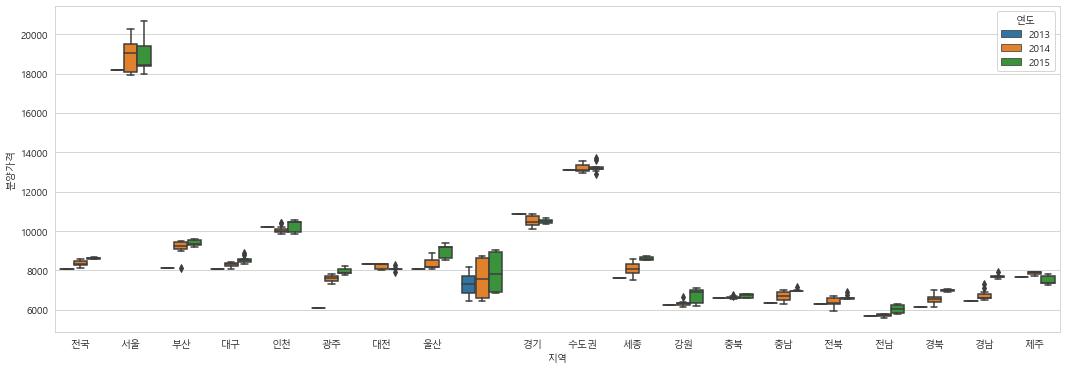

In [93]:
# seaborn - boxplot
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도')

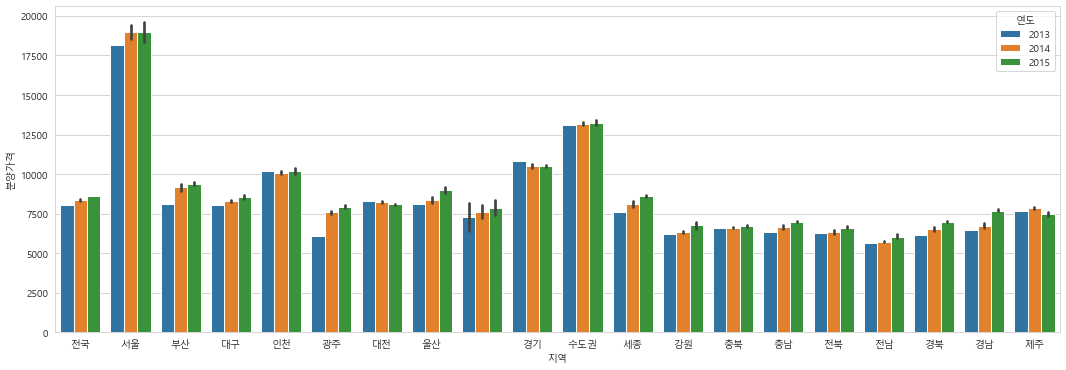

In [94]:
# seaborn - barplot
plt.figure(figsize=(18, 6))
sns.barplot(data=df_2013_2015, x='지역', y='분양가격', hue='연도')

# '검은색 바'가 없는 부분은 연도별로 결측치가 있다는 뜻

In [100]:
# 결측치 개수 
df_2013_2015[ df_2013_2015.isnull() ].shape    # 행, 열

(462, 6)

## 이제 2013년 부터 2018년 7월까지 데이터를 합칠 준비가 됨 

In [114]:
# 2015 ~ 2018은 규모구분='전체' 인것만 가져오도록 설정.
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print( df_2015_2018.shape )   # 행, 열
df_2015_2018.head()           # 상위 5개 데이터

(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,437"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,269"
20,대구,전체,2015,10,2682,"2,682","8,850"


##### 2013 ~ 2015

In [103]:
df_2013_2015.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [104]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [112]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']
df_2013_2015_prepare.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


##### 2015 ~ 2018

In [106]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [107]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,437"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,269"
20,대구,2015,10,"8,850"


In [108]:
df_2015_2018_prepare.describe()     # 수치형 데이터에 대한 요약 

,평당분양가격
count,561
mean,"9,728"
std,"3,367"
min,"6,299"
25%,"7,497"
50%,"8,972"
75%,"10,560"
max,"22,832"


##### 합치기

In [115]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1040, 4)

In [118]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [127]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2865,전북,2018,7,"7,698"
2870,전남,2018,7,"7,778"
2875,경북,2018,7,"8,824"
2880,경남,2018,7,"8,896"
2885,제주,2018,7,"11,002"


##### 2013_2015 와 2015_2018 의 '지역명 '차이 없애기 

In [120]:
df_2013_2015_region = df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [122]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [123]:
exclude_region= [region for region in df_2013_2015_region if not region in df_2015_2018_region]
exclude_region

['전국', '', '수도권']

In [124]:
df_2013_2018.shape

(1040, 4)

In [125]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()    # 전국, 수도권에 해당하는것만 뽑아보았다.

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [126]:
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index,
    axis=0,
    inplace=True)
df_2013_2018.drop(
    df_2013_2018.loc[df_2013_2018['지역명'] == ''].index,
    axis=0,
    inplace=True)

## 2013년 12월 ~ 2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

In [134]:
# 판다스로 시각화 할 때는 미리 구하고자 하는 데이터를 요약해 두는 것이 좋습니다.
df_year_mean = df_2013_2018.groupby(['연도'])['평당분양가격'].mean()     # 그룹바이로 평균값 구하기
df_year_mean

연도
2013    8,059
2014    8,362
2015    8,667
2016    9,321
2017    9,901
2018   10,563
Name: 평당분양가격, dtype: float64

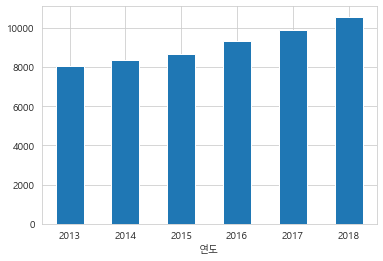

In [135]:
# pandas 의 plot으로 그리기
df_year_mean.plot.bar(rot=0)    # rot=0 : 연도글자 -> 가로

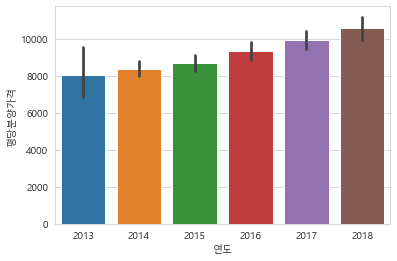

In [136]:
# seaborn 의 barplot
sns.barplot(data=df_2013_2018, x='연도', y='평당분양가격')    # 평당분양가격 = 꾸준히 상승 한것을 알 수 있다.
                                                              # ci(신뢰구간) = 양 극단의 데이터를 제외한 95%의 데이터가 이 구간에 속한다.
                                                              # 양 극단을 벗어나는 값 = 이상치

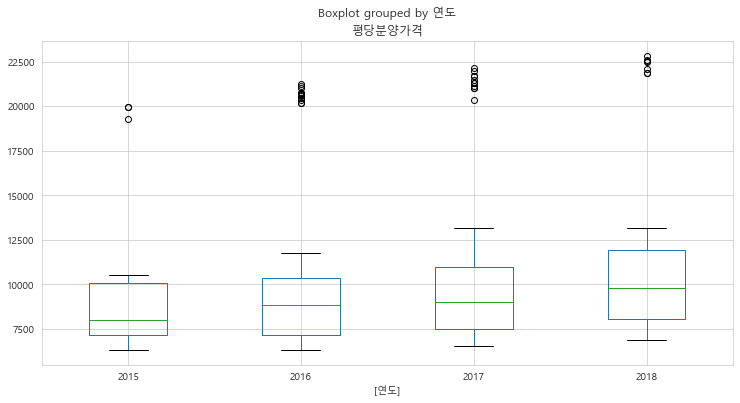

In [137]:
# boxplot
df_2015_2018_prepare[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))     # 초록색 선 = 중간값
                                                                                                   # 검정색 선 = 최대, 최소값 (양 극단 제외)

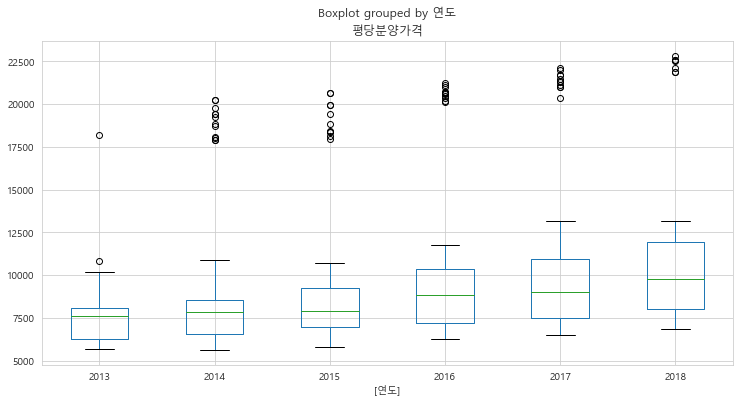

In [138]:
df_2013_2018[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))

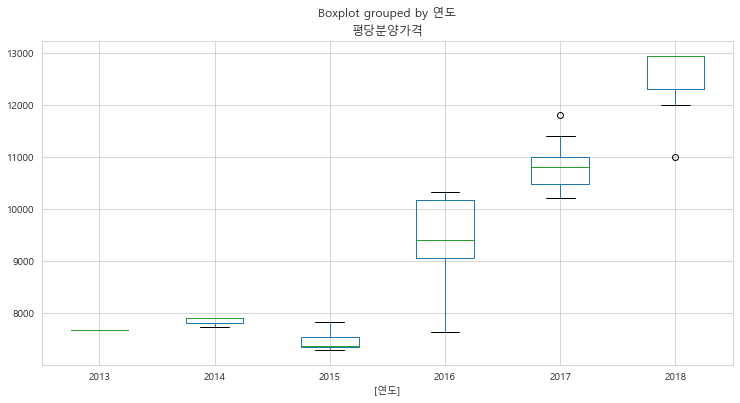

In [139]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
df_2013_2018_jeju[['연도', '지역명', '평당분양가격']].boxplot(by=['연도'], figsize=(12, 6))      # 상당히 변동폭이 크다 (=데이터가 별로 없다)

In [140]:
df_2013_2018_jeju['연도'].value_counts()     # 2013년 에는 데이터가 하나밖에 없어서 납작하게 표시됨 

2014    12
2015    12
2017    12
2016    10
2018     7
2013     1
Name: 연도, dtype: int64